<a href="https://colab.research.google.com/github/ALAN-K-BIJU/Traffic_Saarthi_Model/blob/main/Vehicle_Category_object_detection_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'vehicle-detection-8-classes-object-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1044287%2F1757029%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240215%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240215T125249Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7c3208ae9f36f02d75261509a474898ba91a3df3ce3311f761c3ac4fb014febbbe09251b3a068fa552b851923ef8995ea03885d951f8d4eb821406da4a62959729ac010cc40183440c21642c5cd34c149bf9007ff5dfa16505972301b90c9416ae695e9eb3e7d19a5cf0ecebdd6b749a9535893a8a718d4187b33e26f1c6e7334cfd533ed412321bd51a6ebc123271a5ac8f4c055abcfed0ee530dd09cf1404b530c4532edcd5a2b9aa9bfacf1d9df25f68c0b9703d5e174fe5b5d50502f3e159e404ef8cbf7791ca2e6246d7f02c8dbe9b684c754be4a2dc1f6e8ba4e51f5092c1ac65c3813a6052ba1f378240108bb22a7173f7055b788679f6ce4bdb80099,vehicle-categorization-detection-earned-weights:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3614651%2F6285847%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240215%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240215T125249Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2af1d02e252188edd413a068f34ea7c78352d299ce90bb3f2cf38c74efa033131339f23b356456f3b5da74031e229c94965f4def128fe50612d1963ace178a311e4b2edc76a160ef8e37983919a199ab014a4134f09b45c2eda1619f3dd68181fd5ff99bcf02bff47a465b56a0e7704d7210f0797af6416fb36670d2f1d313dad85be294e12700c8c580e762350935392ca5050eb5e5c70448adfa7b7ab7e1a9ab573aea9acf6ed27c1abfc94bbc428e7a4685eb4bc22f5813b6a4db6ec9bfb412f79a1865cdb921b58116ef094aced97fcecdeb08ecebb1389ac6e273db7b1e04dce50d99f33c1f175e1078ad91113d7024fcce446b3e326f90f1208675675a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 362386701 bytes downloaded
Downloaded and uncompressed: vehicle-detection-8-classes-object-detection
[==================================================] 91703515 bytes downloaded
Downloaded and uncompressed: vehicle-categorization-detection-earned-weights
Data source import complete.


#**Importing Packages and Files**

In [ ]:
!pip install pycocotools
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 11.6 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import copy
import os
import torch
from torch.utils.data import Dataset
from torch.utils.data import Subset
from torch.utils.data import DataLoader
import torch.optim as optim
import torchvision
import torchvision.transforms.functional as tf
from torchvision.models.detection.ssd import SSDHead,det_utils
from torchvision.models.detection import ssd300_vgg16,SSD300_VGG16_Weights
import albumentations as A
from albumentations.pytorch import ToTensorV2
import pycocotools
import torchmetrics
from torchmetrics.detection import MeanAveragePrecision

%matplotlib inline
sns.set_style("dark")

#**Configurations**

In [ ]:
images_dir="/kaggle/input/vehicle-detection-8-classes-object-detection/train/images"
labels_dir="/kaggle/input/vehicle-detection-8-classes-object-detection/train/labels"

#label 0 is fixed for background
classes=["background","Auto","Bus","Car","LCV","Motorcycle","Truck","Tractor","Multi-Axle"]

num_classes=9
device="cuda" if torch.cuda.is_available() else "cpu"
batch_size=4
epochs=50
learning_rate=3e-5

model_weights_file="model.pth"

threshold=0.3
iou_threshold=0.8

#**Exploratory Data Analysis**

In [ ]:
dict_instances=dict(zip(list(range(8)),[0]*8))
cols=["Labels","xcenter","ycenter","width","height"]

for label_file_name in os.listdir(labels_dir):
    label_file_path=os.path.join(labels_dir,label_file_name)

    try:
        label_data=pd.read_csv(label_file_path,delimiter=" ",header=None)
        labels_count=label_data[0].value_counts()

        for idx in labels_count.index:
            dict_instances[idx]+=labels_count[idx]
    except:
        continue

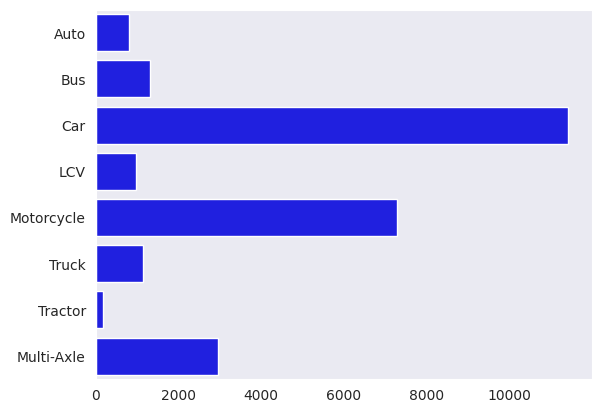

In [ ]:
sns.barplot(y=classes[1:],x=list(dict_instances.values()),color="blue");
plt.savefig("1.png")

#**Data Augmentation**

In [ ]:
train_transform=A.Compose([A.HorizontalFlip(),
                           A.ShiftScaleRotate(rotate_limit=15,value=0,
                                              border_mode=cv2.BORDER_CONSTANT),
                           A.CLAHE(),
                           A.GaussNoise()],
                          bbox_params=A.BboxParams(format="pascal_voc",min_visibility=0.7,
                                                   label_fields=["labels"]))

#**Custom Dataset**

In [ ]:
class Vehicle(Dataset):
    def __init__(self,imgs_dir,annot_dir,transform=None):
        super().__init__()
        self.imgs_dir=imgs_dir
        self.labels_dir=annot_dir
        self.imgs_list=sorted([img_name for img_name in os.listdir(self.imgs_dir)
                               if img_name.endswith(".jpg")])
        self.transform=transform

    def __len__(self):
        return len(self.imgs_list)

    def __getitem__(self,idx):
        img_name=self.imgs_list[idx]
        img_path=os.path.join(self.imgs_dir,img_name)
        img=Image.open(img_path)
        w,h=img.size
        img=np.asarray(img)

        try:
            annot_name=img_name[:-4]+".txt"
            annot_path=os.path.join(self.labels_dir,annot_name)
            annot_data=pd.read_csv(annot_path,delimiter=" ",header=None).values
            labels=annot_data[:,0]
            labels=labels+1
            boxes=annot_data[:,1:5]

            xmin=((boxes[:,0]-boxes[:,2]/2)*w)[:,None]
            ymin=((boxes[:,1]-boxes[:,3]/2)*h)[:,None]
            xmax=((boxes[:,0]+boxes[:,2]/2)*w)[:,None]
            ymax=((boxes[:,1]+boxes[:,3]/2)*h)[:,None]
            boxes=np.concatenate((xmin,ymin,xmax,ymax),axis=1)

            if self.transform is not None:
                transformed=self.transform(image=img,bboxes=boxes,labels=labels)
                img=transformed["image"]
                boxes=transformed["bboxes"]
                labels=transformed["labels"]

            if len(np.array(boxes).shape)!=2 or np.array(boxes).shape[-1]!=4:
                boxes=[[0.0,0.0,1.0,1.0]]
                labels=[0]

        except:
            boxes=[[0.0,0.0,1.0,1.0]]
            labels=[0]

        img=img/255
        img=tf.to_tensor(img)
        img=img.to(dtype=torch.float32)
        target={}
        target["boxes"]=torch.tensor(boxes,dtype=torch.float32)
        target["labels"]=torch.tensor(labels,dtype=torch.int64)
        target["id"]=torch.tensor(idx)

        return img,target

In [ ]:
train_ds=Vehicle(images_dir,labels_dir,train_transform)
val_ds=Vehicle(images_dir,labels_dir)

In [ ]:
idxs=list(range(len(train_ds)))

np.random.shuffle(idxs)
train_idx=idxs[:int(0.8*len(train_ds))]
val_idx=idxs[int(0.8*len(train_ds)):]

train_ds=Subset(train_ds,train_idx)
val_ds=Subset(val_ds,val_idx)

#**Data Visualisation**

In [ ]:
def show_bbox(img,target,axis,color=(0,255,0)):
    img=np.transpose(img.cpu().numpy(),(1,2,0))
    boxes=target["boxes"].cpu().numpy().astype("int")
    labels=target["labels"].cpu().numpy()
    img=img.copy()
    for i,box in enumerate(boxes):
        idx=int(labels[i])
        text=classes[idx]

        cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),color,2)
        y=box[1]-10 if box[1]-10>10 else box[1]+10
        cv2.putText(img,text,(box[0],y),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)

    axis.imshow(img)
    axis.axis("off")

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(12,24))
plt.subplots_adjust(wspace=0.1,hspace=0.1)
ax=axes.flatten()

idxs=np.random.choice(range(len(train_ds)),8)

for i,idx in enumerate(idxs):
    img,target=train_ds[idx]
    show_bbox(img,target,axis=ax[i])

plt.savefig("2.png")

#**Data Loader**

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [ ]:
train_dl=DataLoader(train_ds,batch_size=batch_size,shuffle=True,num_workers=os.cpu_count(),
                    collate_fn=collate_fn,
                    pin_memory=True if device=="cuda" else False)
val_dl=DataLoader(val_ds,batch_size=batch_size,shuffle=False,num_workers=os.cpu_count(),
                  collate_fn=collate_fn,
                  pin_memory=True if device=="cuda" else False)

#**Model**

In [ ]:
model=ssd300_vgg16(weights=SSD300_VGG16_Weights.DEFAULT)

in_channels=det_utils.retrieve_out_channels(model.backbone,(300,300))
num_anchors=model.anchor_generator.num_anchors_per_location()
model.head=SSDHead(in_channels=in_channels,num_anchors=num_anchors,
                   num_classes=num_classes)

model.to(device)

Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 126MB/s]


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [ ]:
for params in model.backbone.features.parameters():
    params.requires_grad=False

parameters=[params for params in model.parameters() if params.requires_grad]

optimizer=optim.Adam(parameters,lr=learning_rate)
lr_scheduler=optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1,
                                                  patience=7, threshold=0.0001)

#**Training**

In [ ]:
def get_lr(optimizer):
    for params in optimizer.param_groups:
        return params["lr"]

In [ ]:
#The model has been trained and learned weights are available in
#Vehicle Categorization Detection Learned Weights dataset model.pth file
# the below code if you want to perform training takes 5.5 hrs

loss_history={"training_loss":[],
              "validation_loss":[]}

train_len=len(train_dl.dataset)
val_len=len(val_dl.dataset)

best_validation_loss=np.inf
best_weights=copy.deepcopy(model.state_dict())

for epoch in range(epochs):

    training_loss=0.0
    validation_loss=0.0

    current_lr=get_lr(optimizer)

    #During training, the model expects both the input tensors, as well as a targets
    model.train()
    for imgs,targets in train_dl:
        imgs=[img.to(device) for img in imgs]
        targets=[{k:v.to(device) for (k,v) in d.items()} for d in targets]

        loss_dict=model(imgs,targets)
        losses=sum(loss for loss in loss_dict.values())
        training_loss+=losses.item()

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

    with torch.no_grad():
        for imgs,targets in val_dl:
            imgs=[img.to(device) for img in imgs]
            targets=[{k:v.to(device) for (k,v) in d.items()} for d in targets]

            loss_dict=model(imgs,targets)
            losses=sum(loss for loss in loss_dict.values())
            validation_loss+=losses.item()


    lr_scheduler.step(validation_loss)
    if current_lr!=get_lr(optimizer):
        print("Loading best Model weights")
        model.load_state_dict(best_weights)

    if validation_loss<best_validation_loss:
        best_validation_loss=validation_loss
        best_weights=copy.deepcopy(model.state_dict())
        print("Updating Best Model weights")


    loss_history["training_loss"].append(training_loss/train_len)
    loss_history["validation_loss"].append(validation_loss/val_len)

    print(f"\n{epoch+1}/{epochs}")
    print(f"Training Loss: {training_loss/train_len}")
    print(f"Validation_loss: {validation_loss/val_len}")
    print("\n"+"*"*50)

torch.save(best_weights,model_weights_file)

NameError: name 'train_dl' is not defined

In [ ]:
sns.lineplot(x=range(epochs),y=loss_history["training_loss"],label="Train Losses");
sns.lineplot(x=range(epochs),y=loss_history["validation_loss"],label="Validation Losses");
plt.title("Training Validation Datasets Losses Plot");
plt.legend();

#**Evaluation**

In [ ]:
model_learned_weights="/kaggle/input/vehicle-categorization-detection-earned-weights/model.pth"
model=ssd300_vgg16(weights=None,weights_backbone=None)

in_channels=det_utils.retrieve_out_channels(model.backbone,(300,300))
num_anchors=model.anchor_generator.num_anchors_per_location()
model.head=SSDHead(in_channels=in_channels,num_anchors=num_anchors,
                   num_classes=num_classes)

model.load_state_dict(torch.load(model_learned_weights,map_location=device))
model.to(device)

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [ ]:
def preprocess_bbox(prediction):

    """Non-max suppression is the final step of these object detection algorithms and is
       used to select the most appropriate bounding box for the object.
       The NMS takes two things into account
        -The objectiveness score is given by the model
        -The overlap or IOU of the bounding boxes"""

    processed_bbox={}

    boxes=prediction["boxes"][prediction["scores"]>=threshold]
    scores=prediction["scores"][prediction["scores"]>=threshold]
    labels=prediction["labels"][prediction["scores"]>=threshold]
    nms=torchvision.ops.nms(boxes,scores,iou_threshold=iou_threshold)

    processed_bbox["boxes"]=boxes[nms]
    processed_bbox["scores"]=scores[nms]
    processed_bbox["labels"]=labels[nms]

    return processed_bbox

In [ ]:
metric=MeanAveragePrecision(box_format='xyxy',class_metrics=True)
metric.to(device)

model.eval()
with torch.no_grad():
    for imgs,targets in val_dl:
        imgs=[img.to(device) for img in imgs]
        targets=[{k:v.to(device) for (k,v) in d.items()} for d in targets]
        predictions=model(imgs)

        results=[]
        for prediction in predictions:
            results.append(preprocess_bbox(prediction))

        metric.update(results,targets)

results=metric.compute()

In [ ]:
mean_ap=results["map"].item()
mean_ap_50=results["map_50"].item()
mean_ap_75=results["map_75"].item()

print(f"Mean Average Precision[0.5:0.95:0.05] : {mean_ap:.4f}")
print(f"Mean Average Precision @ 0.5          : {mean_ap_50:.4f}")
print(f"Mean Average Precision @ 0.75         : {mean_ap_75:.4f}")

Mean Average Precision[0.5:0.95:0.05] : 0.4050
Mean Average Precision @ 0.5          : 0.5599
Mean Average Precision @ 0.75         : 0.4873


In [ ]:
if (len(results["map_per_class"])==len(classes)):
    map_per_class=results["map_per_class"][1:].tolist()
    mar_100_per_class=results["mar_100_per_class"][1:].tolist()
    obj_cls=classes[1:]
else:
    map_per_class=results["map_per_class"].tolist()
    mar_100_per_class=results["mar_100_per_class"].tolist()
    obj_cls=classes[1:]

data=list(zip(map_per_class,mar_100_per_class))
columns=["Mean_Avg_Precision","Mean_Avg_Recall"]
cls_map=pd.DataFrame(data,columns=columns,index=obj_cls)
cls_map.style.background_gradient(subset=columns,cmap="YlOrRd",high=0.75)

,Mean_Avg_Precision,Mean_Avg_Recall
Auto,0.290023,0.307386
Bus,0.554581,0.592806
Car,0.455219,0.510188
LCV,0.554877,0.589904
Motorcycle,0.194397,0.263585
Truck,0.608042,0.649004
Tractor,0.519843,0.563333
Multi-Axle,0.467920,0.504671


#**Inference**

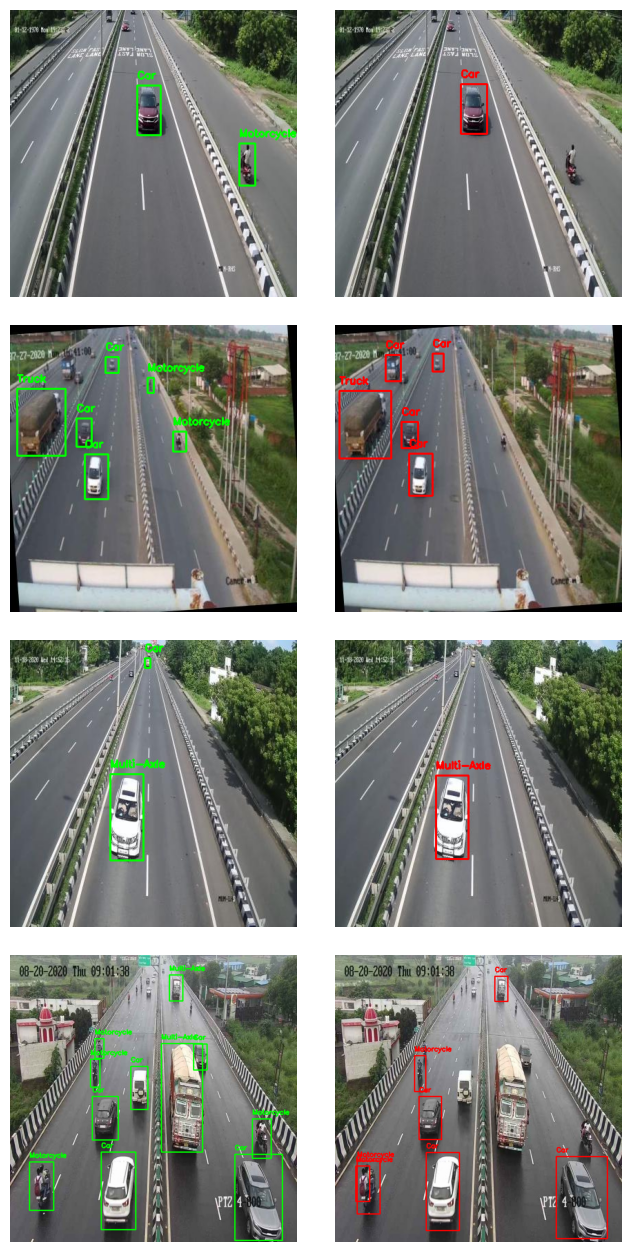

In [ ]:
"""During inference, the model requires only the input tensors, and returns the
   post-processed predictions as a List[Dict[Tensor]], one for each input image. The fields
   of the Dict are as follows:
   - boxes (FloatTensor[N, 4]): the predicted boxes in [x0, y0, x1, y1] format
   - labels (Int64Tensor[N]): the predicted labels for each image
   - scores (Tensor[N]): the scores or each prediction"""

fig,axes=plt.subplots(4,2,figsize=(8,16))
plt.subplots_adjust(wspace=0.1,hspace=0.1)

imgs,targets=next(iter(val_dl))
model.eval()
with torch.no_grad():
    output=model([img.to(device) for img in imgs])

for i,idx in enumerate(range(len(imgs))):
    img=imgs[idx]
    prediction=output[idx]

    #real bounding boxes
    show_bbox(img,targets[idx],axes[i,0],color=(0,255,0))

    #predicted bounding box
    predict=preprocess_bbox(prediction)

    show_bbox(img,predict,axes[i,1],color=(255,0,0));

plt.savefig("4.png")